In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn import set_config
set_config(display = 'diagram')

# Sklearn preprocessing
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.ensemble import AdaBoostRegressor, VotingRegressor, GradientBoostingRegressor, StackingRegressor, RandomForestRegressor
from sklearn.feature_selection import SelectPercentile, mutual_info_regression, VarianceThreshold, SelectFromModel
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [3]:
from tensorflow.keras import Sequential, layers

2024-09-11 09:22:34.288957: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# EDA

In [3]:
# for brands: target encoder from scikit learn

In [24]:
df = pd.read_csv('../raw_data/vestiaire.csv')
df.head(2)

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,...,Tourcoing,25775970,vitalii25775970,NaN,Germany,3.0,14.0,0.0,13.0,0.0
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,...,Tourcoing,13698770,olivia13698770,NaN,Belgium,0.0,0.0,0.0,8.0,0.0


In [5]:
df.describe()

,product_id,product_like_count,brand_id,price_usd,seller_price,seller_earning,buyers_fees,seller_id,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
count,9.005140e+05,900514.000000,900514.000000,900514.000000,900514.000000,900514.000000,886778.000000,9.005140e+05,900514.000000,900514.000000,9.005140e+05,9.005140e+05,900514.000000
mean,3.810003e+07,6.298326,2437.277576,386.862536,331.639409,290.436463,55.486152,1.382227e+07,664.958267,1497.663143,5.623160e+04,9.904618e+03,72.461753
std,7.749403e+06,12.920079,3702.869580,1859.559156,1591.472807,1498.157606,290.259974,7.535593e+06,3552.744596,5460.166852,1.438156e+05,3.557486e+05,34.428663
min,1.113630e+05,0.000000,2.000000,6.130000,5.110000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,-180.000000
25%,3.811580e+07,1.000000,66.000000,83.070000,71.360000,58.580000,11.720000,7.977389e+06,6.000000,10.000000,0.000000e+00,1.700000e+01,68.000000
50%,4.174207e+07,3.000000,341.000000,168.700000,143.780000,125.370000,23.970000,1.438324e+07,34.000000,52.000000,0.000000e+00,7.300000e+01,88.000000
75%,4.267775e+07,7.000000,3266.000000,350.000000,298.200000,261.900000,50.480000,1.946235e+07,178.000000,373.000000,2.539300e+04,2.900000e+02,95.000000
max,4.324884e+07,3154.000000,18237.000000,632610.000000,527175.000000,509229.750000,105435.000000,2.608177e+07,79738.000000,39628.000000,1.064736e+06,1.417912e+07,100.000000


In [6]:
df.isnull().sum()


product_id                         0
product_type                       0
product_name                       0
product_description                7
product_keywords                1183
product_gender_target              0
product_category                1183
product_season                     2
product_condition                  0
product_like_count                 0
sold                               0
reserved                           0
available                          0
in_stock                           0
should_be_gone                     0
brand_id                           0
brand_name                         0
brand_url                          0
product_material                   4
product_color                      1
price_usd                          0
seller_price                       0
seller_earning                     0
seller_badge                       0
has_cross_border_fees          13736
buyers_fees                    13736
warehouse_name                     0
s

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900514 entries, 0 to 900513
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  900514 non-null  int64  
 1   product_type                900514 non-null  object 
 2   product_name                900514 non-null  object 
 3   product_description         900507 non-null  object 
 4   product_keywords            899331 non-null  object 
 5   product_gender_target       900514 non-null  object 
 6   product_category            899331 non-null  object 
 7   product_season              900512 non-null  object 
 8   product_condition           900514 non-null  object 
 9   product_like_count          900514 non-null  float64
 10  sold                        900514 non-null  bool   
 11  reserved                    900514 non-null  bool   
 12  available                   900514 non-null  bool   
 13  in_stock      

In [8]:
df.dtypes


product_id                      int64
product_type                   object
product_name                   object
product_description            object
product_keywords               object
product_gender_target          object
product_category               object
product_season                 object
product_condition              object
product_like_count            float64
sold                             bool
reserved                         bool
available                        bool
in_stock                         bool
should_be_gone                   bool
brand_id                        int64
brand_name                     object
brand_url                      object
product_material               object
product_color                  object
price_usd                     float64
seller_price                  float64
seller_earning                float64
seller_badge                   object
has_cross_border_fees          object
buyers_fees                   float64
warehouse_na

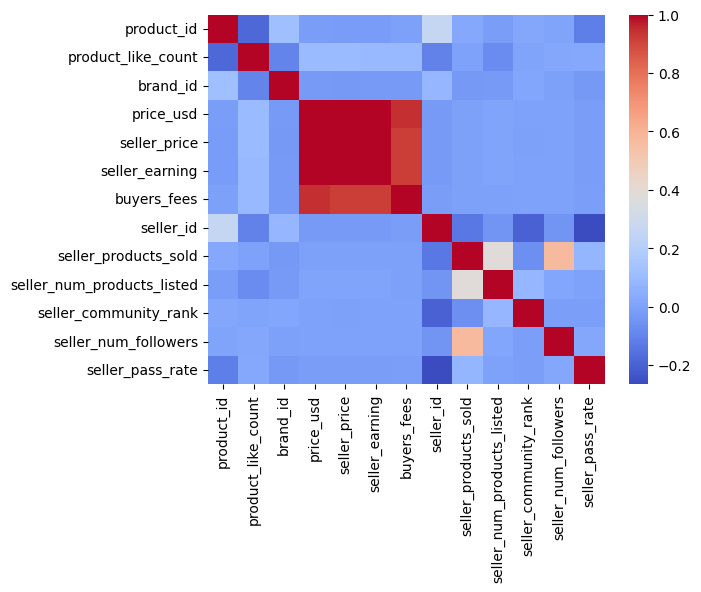

In [9]:
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr, cmap='coolwarm')
plt.show()


<Axes: >

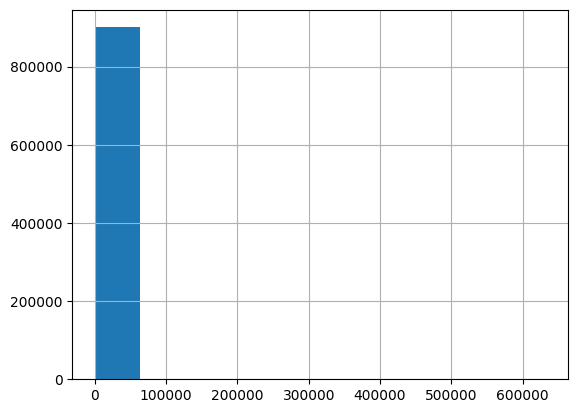

In [10]:
df['price_usd'].hist()

<Axes: >

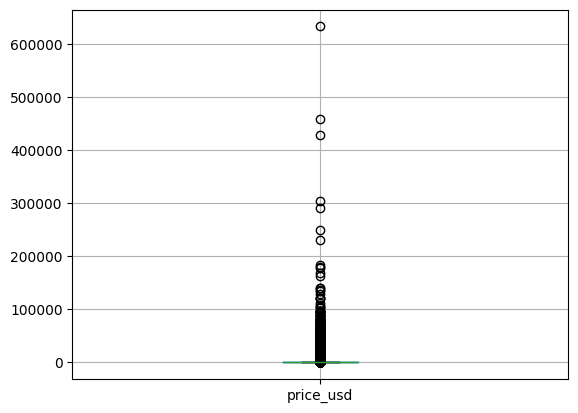

In [11]:
df.boxplot(column='price_usd')


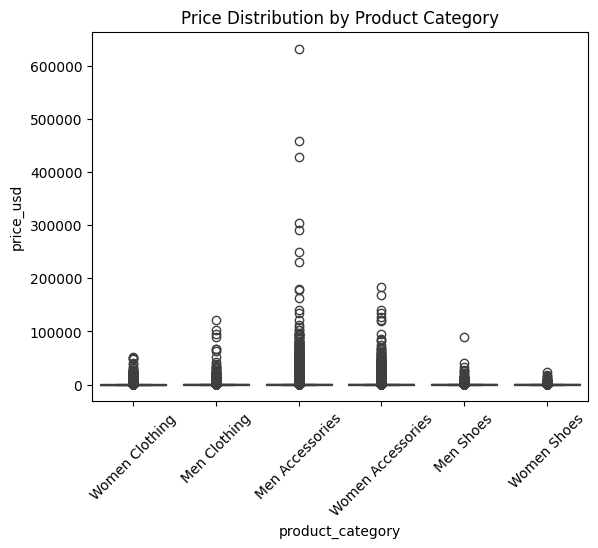

In [13]:
sns.boxplot(x='product_category', y='price_usd', data=df)
plt.xticks(rotation=45)
plt.title('Price Distribution by Product Category')
plt.show()

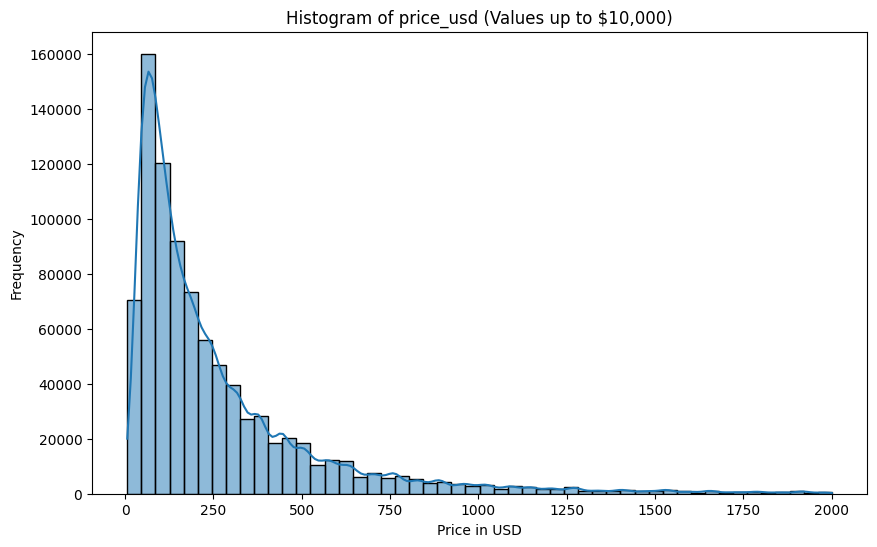

In [5]:
df_filtered = df[df['price_usd'] <= 2000]

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['price_usd'], bins=50, kde=True)
plt.title('Histogram of price_usd (Values up to $10,000)')
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.show()

In [25]:
df_capped = df[df['price_usd'] <= 10000]

# Display the first few rows of the new dataframe to confirm
df_capped.shape

(898367, 36)

In [45]:
df_high = df[df['price_usd'] >= 10000]
df_high.shape

(2150, 36)

In [16]:
df.shape

(900514, 36)

In [17]:
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

product_description           7
product_keywords           1183
product_category           1183
product_season                2
product_material              4
product_color                 1
has_cross_border_fees     13736
buyers_fees               13736
seller_username              39
usually_ships_within     154791
dtype: int64


In [18]:
import numpy as np

df['usually_ships_within'] = df['usually_ships_within'].replace(np.nan, "1-2 days") # Replace NaN by most common value
df['usually_ships_within'].value_counts()

usually_ships_within
1-2 days            701734
3-5 days            180755
6-7 days             16816
More than 7 days      1209
Name: count, dtype: int64

In [19]:
df['has_cross_border_fees'].value_counts()

has_cross_border_fees
True    886778
Name: count, dtype: int64

In [20]:
df['has_cross_border_fees'] = df['has_cross_border_fees'].replace(np.nan, False) # Replace NaN by most common value
df['has_cross_border_fees'].value_counts()


/var/folders/51/br93cpt16z799l0l6d9pln2h0000gn/T/ipykernel_66616/3563962384.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['has_cross_border_fees'] = df['has_cross_border_fees'].replace(np.nan, False) # Replace NaN by most common value


has_cross_border_fees
True     886778
False     13736
Name: count, dtype: int64

In [21]:
df['buyers_fees'] = df['buyers_fees'].replace(np.nan, 0) # Replace NaN by most common value
df['buyers_fees']


0           0.00
1          21.30
2         213.00
3          14.90
4          19.95
           ...  
900509     14.91
900510     25.56
900511     31.95
900512      9.59
900513    159.75
Name: buyers_fees, Length: 900514, dtype: float64

In [22]:
df[['has_cross_border_fees', 'buyers_fees']]

,has_cross_border_fees,buyers_fees
0,False,0.00
1,True,21.30
2,True,213.00
3,True,14.90
4,True,19.95
...,...,...
900509,True,14.91
900510,True,25.56
900511,True,31.95
900512,True,9.59


In [23]:
#remove remaining null values, drop rows
df = df.dropna()


In [24]:
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

Series([], dtype: int64)


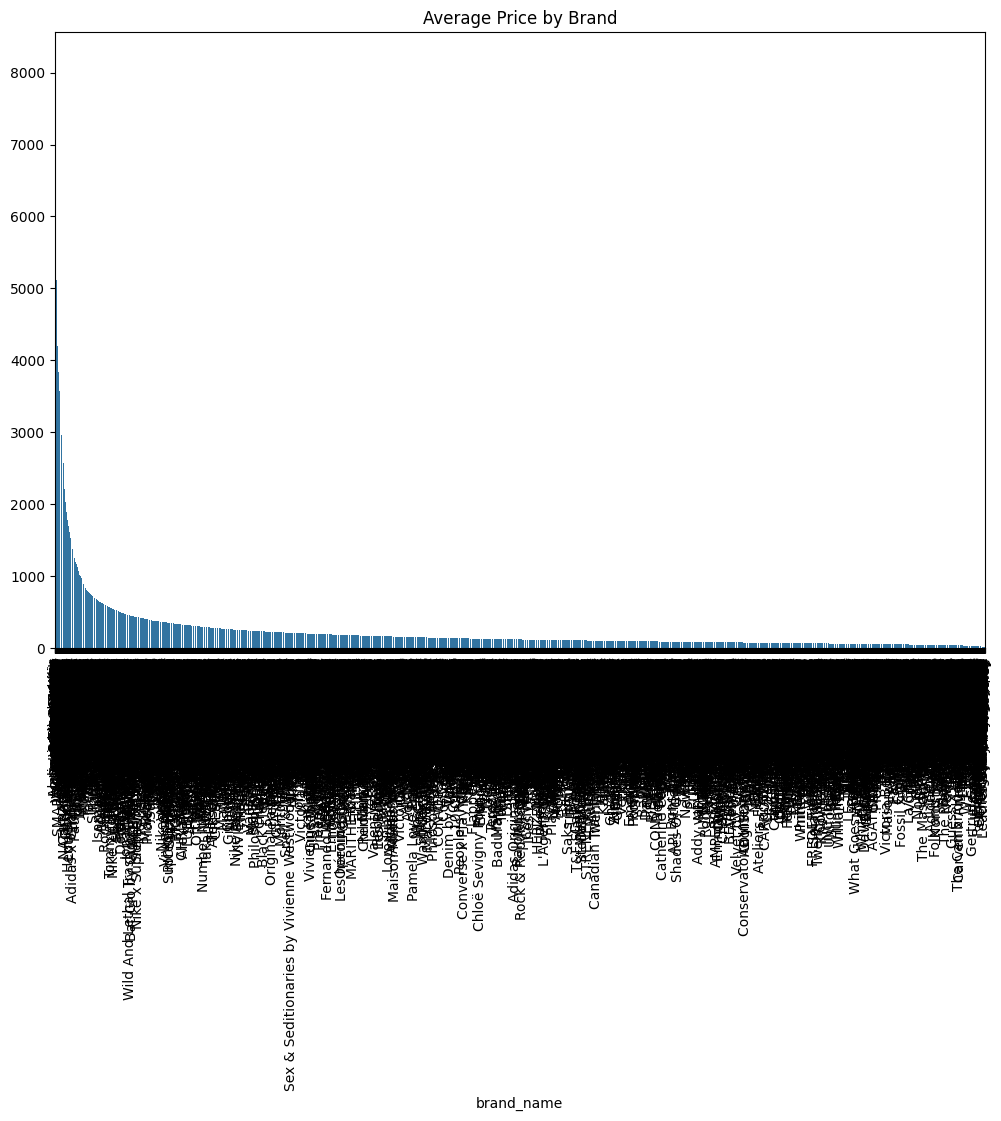

In [31]:
brand_price_avg = df_capped.groupby('brand_name')['price_usd'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=brand_price_avg.index, y=brand_price_avg.values)
plt.xticks(rotation=90)
plt.title('Average Price by Brand')
plt.show()

In [27]:
df['brand_name'].value_counts().head(40)

brand_name
Gucci                  41008
Burberry               24018
Dolce & Gabbana        22024
Prada                  20972
Hermès                 18711
Louis Vuitton          18673
Chanel                 15006
Nike                   13621
Valentino Garavani     10641
Balenciaga             10571
Dior                   10492
Fendi                  10460
Adidas                 10030
Saint Laurent           9887
Versace                 9786
Polo Ralph Lauren       9097
Christian Louboutin     7852
Bottega Veneta          6871
Yves Saint Laurent      6757
Dsquared2               6383
Givenchy                6336
Salvatore Ferragamo     5940
Tod's                   5826
Max Mara                5808
Celine                  5787
Alexander McQueen       5534
Jimmy Choo              5051
Dior Homme              4898
Moncler                 4881
Miu Miu                 4413
Moschino                4289
Michael Kors            4285
D&G                     4262
Sandro                  4261
Bos

In [10]:
shipping_days_mapping = {
    '1-2 days': 1.5,
    '3-5 days': 4,
    '6-7 days': 6.5,
    'More than 7 days': 8  # or another appropriate value based on your data
}
#df['shipping_days'] = df['usually_ships_within'].map(shipping_days_mapping)


In [30]:
df['usually_ships_within'].unique()

array(['1-2 days', '3-5 days', '6-7 days', 'More than 7 days'],
      dtype=object)

In [11]:
color_mapping = {
    'Grey': 'Neutrals',
    'Navy': 'Neutrals',
    'White': 'Neutrals',
    'Black': 'Neutrals',
    'Beige': 'Neutrals',
    'Ecru': 'Neutrals',
    'Anthracite': 'Neutrals',
    'Charcoal': 'Neutrals',
    'Khaki': 'Neutrals',
    'Camel': 'Neutrals',
    'camel': 'Neutrals',
    'Brown': 'Neutrals',
    'White / Black': 'Neutrals',
    'Beige / Grey': 'Neutrals',
    'brown/black': 'Neutrals',

    'Red': 'Colorful',
    'Green': 'Colorful',
    'Blue': 'Colorful',
    'Turquoise': 'Colorful',
    'Yellow': 'Colorful',
    'Pink': 'Colorful',
    'Orange': 'Colorful',
    'Burgundy': 'Colorful',
    'Purple': 'Colorful',
    'Bordeaux': 'Colorful',

    'Metallic': 'Special',
    'Gold': 'Special',
    'Silver': 'Special',
    'silver/black': 'Special',
    'Multicolour': 'Special'
}

In [32]:
df['color_group'] = df['product_color'].map(color_mapping)
df.head(2)

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate,material_group,shipping_days,color_group
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,...,1-2 days,Germany,3.0,14.0,0.0,13.0,0.0,Natural Fibers,1.5,Neutrals
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,...,1-2 days,Belgium,0.0,0.0,0.0,8.0,0.0,Natural Fibers,1.5,Neutrals


In [12]:
df['gender_binary'] = df['product_gender_target'].map({'Men': 0, 'Women': 1})
df.head(1)
df.shape

(900514, 37)

In [34]:
df_dropped = df.drop(['product_gender_target','product_id', 'product_type', 'brand_url', 'brand_id', 'brand_name', 
                      'product_material', 'product_color', 'product_name', 
                      'product_description', 'product_keywords', 'warehouse_name', 'seller_id',
                      'seller_pass_rate', 'seller_num_followers', 'seller_country', 'seller_price', 
                      'seller_earning', 'seller_community_rank', 'seller_username', 
                      'seller_num_products_listed', 'sold', 'reserved', 'available', 
                      'in_stock', 'should_be_gone', 'has_cross_border_fees', 'usually_ships_within'], axis=1)
df_dropped.head()

,product_category,product_season,product_condition,product_like_count,price_usd,seller_badge,buyers_fees,seller_products_sold,material_group,shipping_days,color_group,gender_binary
0,Women Clothing,Autumn / Winter,Never worn,34.0,272.92,Common,0.00,3.0,Natural Fibers,1.5,Neutrals,1
1,Women Clothing,All seasons,Very good condition,1.0,127.80,Common,21.30,0.0,Natural Fibers,1.5,Neutrals,1
2,Women Clothing,Autumn / Winter,Very good condition,2.0,1278.00,Expert,213.00,58.0,Natural Fibers,1.5,Neutrals,1
3,Women Clothing,All seasons,Very good condition,0.0,163.90,Expert,14.90,63.0,Synthetic Fibers,1.5,Neutrals,1
4,Women Clothing,All seasons,Very good condition,1.0,119.72,Common,19.95,19.0,Other Materials,4.0,Neutrals,1


In [35]:
df2 = df_dropped[df_dropped['price_usd'] <= 10000]
df2.shape

(897131, 12)

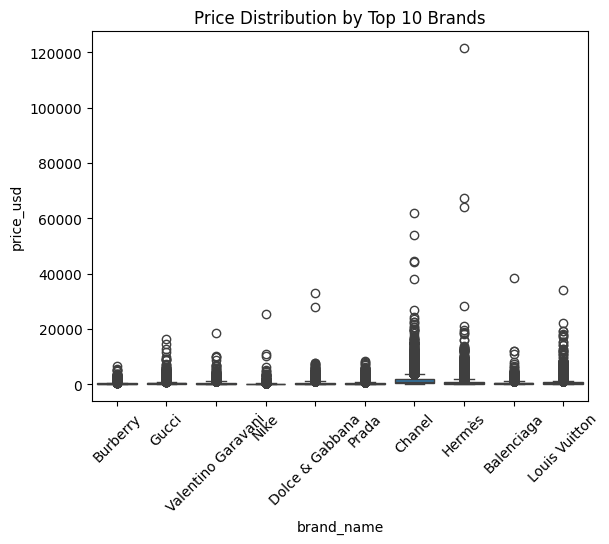

In [12]:
# Boxplot for Brands (only top brands to avoid clutter)
top_brands = df['brand_name'].value_counts().index[:10]  # Select top 10 brands by frequency
sns.boxplot(x='brand_name', y='price_usd', data=df[df['brand_name'].isin(top_brands)])
plt.xticks(rotation=45)
plt.title('Price Distribution by Top 10 Brands')
plt.show()


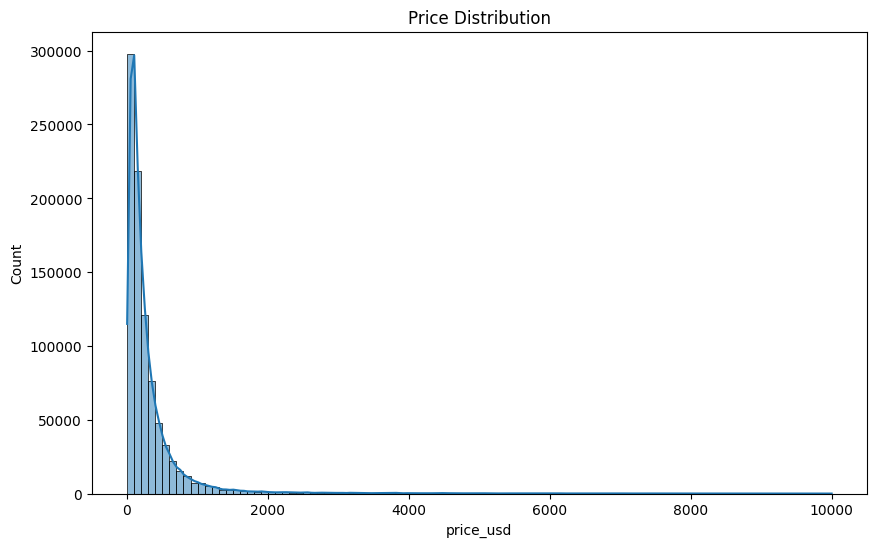

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_capped, x='price_usd', bins=100, kde=True)
plt.title('Price Distribution')
plt.show()

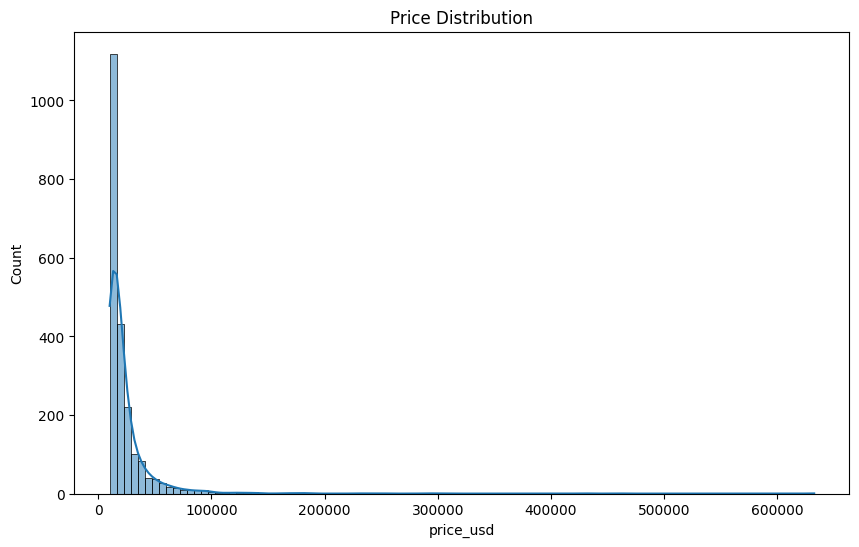

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_high, x='price_usd', bins=100, kde=True)
plt.title('Price Distribution')
plt.show()

/var/folders/51/br93cpt16z799l0l6d9pln2h0000gn/T/ipykernel_8270/2459245532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_capped['log_price_usd'] = np.log1p(df_capped['price_usd'])


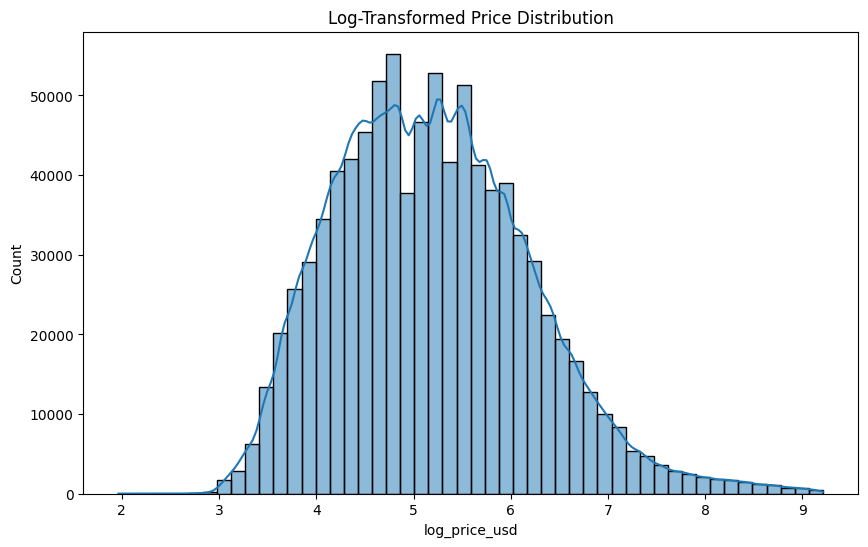

In [29]:
df_capped['log_price_usd'] = np.log1p(df_capped['price_usd'])

plt.figure(figsize=(10, 6))
sns.histplot(df_capped['log_price_usd'], bins=50, kde=True)
plt.title('Log-Transformed Price Distribution')
plt.show()

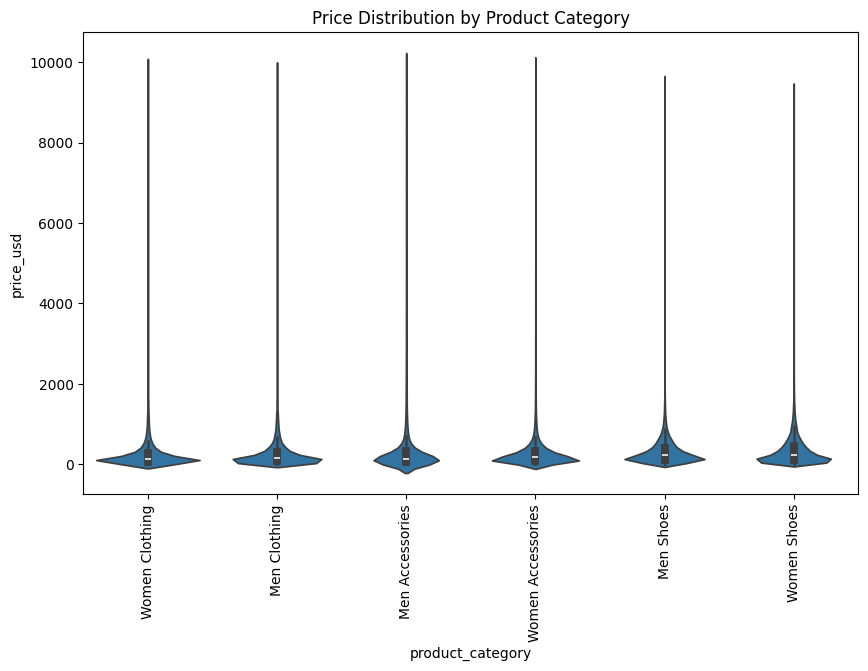

In [32]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='product_category', y='price_usd', data=df_capped)
plt.xticks(rotation=90)
plt.title('Price Distribution by Product Category')
plt.show()

<Axes: xlabel='price_usd', ylabel='Count'>

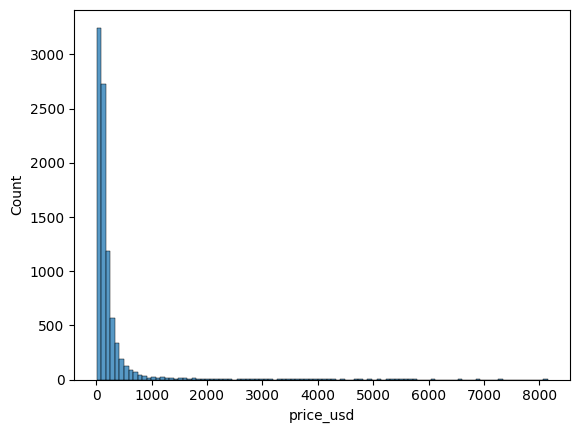

In [26]:
brand_avg_price = df_capped.groupby('brand_name')['price_usd'].mean()

# Sort the brands by average price in descending order
top_brands = brand_avg_price.sort_values(ascending=False).head(20)
sns.histplot(brand_avg_price, bins=100)

# Preprocessing

In [8]:
material_mapping = {
    'Wool': 'Natural Fibers',
    'Cotton': 'Natural Fibers',
    'Silk': 'Natural Fibers',
    'Linen': 'Natural Fibers',
    'Cashmere': 'Natural Fibers',
    'Polyester': 'Synthetic Fibers',
    'Polyamide': 'Synthetic Fibers',
    'Synthetic': 'Synthetic Fibers',
    'Lycra': 'Synthetic Fibers',
    'Spandex': 'Synthetic Fibers',
    'Leather': 'Animal-Based Materials',
    'Suede': 'Animal-Based Materials',
    'Fur': 'Animal-Based Materials',
    'Rabbit': 'Animal-Based Materials',
    'Mink': 'Animal-Based Materials',
    'Fox': 'Animal-Based Materials',
    'Python': 'Animal-Based Materials',
    'Shearling': 'Animal-Based Materials',
    'Alligator': 'Animal-Based Materials',
    'Crocodile': 'Animal-Based Materials',
    'Chinchilla': 'Animal-Based Materials',
    'Pony-style calfskin': 'Animal-Based Materials',
    'Water snake': 'Animal-Based Materials',
    'Eel': 'Animal-Based Materials',
    'Gold': 'Metals',
    'Platinum': 'Metals',
    'Titanium': 'Metals',
    'Silver': 'Metals',
    'Steel': 'Metals',
    'Gold plated': 'Metals',
    'White gold': 'Metals',
    'Yellow gold': 'Metals',
    'Silver Plated': 'Metals',
    'Silver Gilt': 'Metals',
    'Cotton - elasthane': 'Blends',
    'Denim - Jeans': 'Blends',
    'Wicker': 'Blends',
    'Vegan leather': 'Other Materials',
    'Velvet': 'Other Materials',
    'Lace': 'Other Materials',
    'Glitter': 'Other Materials',
    'Tweed': 'Other Materials',
    'Vinyl': 'Other Materials',
    'Exotic leathers': 'Other Materials',
    'Plastic': 'Other Materials',
    'Patent leather': 'Other Materials',
    'Astrakhan': 'Other Materials',
    'Ostrich': 'Other Materials',
    'Sponge': 'Other Materials',
    'Rubber': 'Other Materials',
    'Wood': 'Other Materials',
    'Ceramic': 'Other Materials',
    'Glass': 'Other Materials',
    'Pearl': 'Other Materials',
    'Chain': 'Metals',
    'Pearls': 'Other Materials',
    'Varan': 'Other Materials',
    'Not specified': 'Unspecified'
}
df['material_group'] = df['product_material'].map(material_mapping)
df.head(1)

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate,material_group
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,...,25775970,vitalii25775970,NaN,Germany,3.0,14.0,0.0,13.0,0.0,Natural Fibers


In [36]:
y = df2['price_usd']
X = df2.drop(columns=['price_usd'])

X



,product_category,product_season,product_condition,product_like_count,seller_badge,buyers_fees,seller_products_sold,material_group,shipping_days,color_group,gender_binary
0,Women Clothing,Autumn / Winter,Never worn,34.0,Common,0.00,3.0,Natural Fibers,1.5,Neutrals,1
1,Women Clothing,All seasons,Very good condition,1.0,Common,21.30,0.0,Natural Fibers,1.5,Neutrals,1
2,Women Clothing,Autumn / Winter,Very good condition,2.0,Expert,213.00,58.0,Natural Fibers,1.5,Neutrals,1
3,Women Clothing,All seasons,Very good condition,0.0,Expert,14.90,63.0,Synthetic Fibers,1.5,Neutrals,1
4,Women Clothing,All seasons,Very good condition,1.0,Common,19.95,19.0,Other Materials,4.0,Neutrals,1
...,...,...,...,...,...,...,...,...,...,...,...
900509,Women Shoes,All seasons,Good condition,1.0,Expert,14.91,40.0,Other Materials,1.5,Special,1
900510,Women Shoes,All seasons,Good condition,1.0,Expert,25.56,26.0,Animal-Based Materials,1.5,Neutrals,1
900511,Women Shoes,All seasons,Very good condition,0.0,Common,31.95,0.0,Animal-Based Materials,1.5,Neutrals,1
900512,Women Shoes,All seasons,Very good condition,27.0,Trusted,9.59,2.0,Animal-Based Materials,1.5,Neutrals,1


In [37]:
X.dtypes

product_category         object
product_season           object
product_condition        object
product_like_count      float64
seller_badge             object
buyers_fees             float64
seller_products_sold    float64
material_group           object
shipping_days           float64
color_group              object
gender_binary             int64
dtype: object

In [13]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
df['seller_badge'].unique()

array(['Common', 'Expert', 'Trusted'], dtype=object)

<Axes: xlabel='product_like_count', ylabel='Count'>

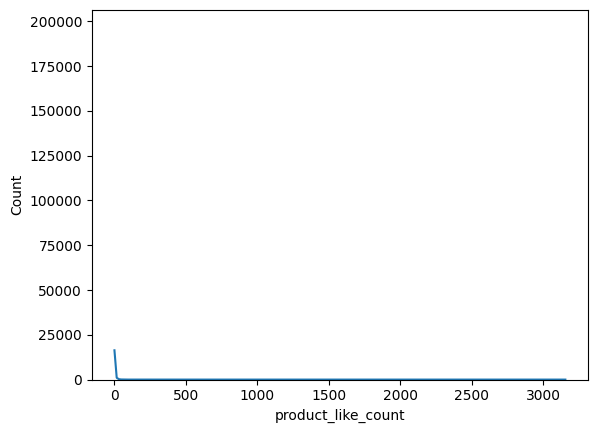

In [40]:
sns.histplot(df2['product_like_count'],kde = True)


In [14]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder


In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import TargetEncoder

In [16]:
# Define the transformers for numerical and categorical features
num_transformer = make_pipeline(RobustScaler())

# Categorical feature transformers
cat_transformer = make_pipeline(OneHotEncoder(sparse_output=False, handle_unknown='ignore'))

# Ordinal feature transformers
ord_enc_product_condition = OrdinalEncoder(categories=[['Fair condition', 'Good condition', 'Very good condition', 'Never worn', 'Never worn, with tag']])
ord_enc_seller_badge = OrdinalEncoder(categories=[['Common', 'Trusted', 'Expert']])

In [44]:
# Create a preprocessor pipeline
preproc_baseline = ColumnTransformer(
    transformers=[
        ('num', num_transformer, ['product_like_count', 'buyers_fees', 'seller_products_sold', 'shipping_days']),
        ('cat', cat_transformer, ['product_category', 'product_season', 'material_group', 'color_group']),
        ('ord_condition', ord_enc_product_condition, ['product_condition']),
        ('ord_badge', ord_enc_seller_badge, ['seller_badge'])
    ],
    remainder='passthrough'  # Drop any other columns not specified in transformers
)

preproc_baseline

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('robustscaler',
                                                  RobustScaler())]),
                                 ['product_like_count', 'buyers_fees',
                                  'seller_products_sold', 'shipping_days']),
                                ('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['product_category', 'product_season',
                                  'material_group', 'color_group']),
                                ('ord_condition',
                                 OrdinalEncoder(categories=[['Fair condition',
                                                             'Good condition',
                                                             'Very good '
                                                             'condition',
                                                             'Never worn',
                                                             'Never worn, with '
                                                             'tag']]),
                                 ['product_condition']),
                                ('ord_badge',
                                 OrdinalEncoder(categories=[['Common',
                                                             'Trusted',
                                                             'Expert']]),
                                 ['seller_badge'])])

In [45]:
# Fit and transform the data
X_train_transformed = preproc_baseline.fit_transform(X_train)
X_train_transformed.shape

(717704, 27)

In [46]:
pd.DataFrame(
    X_train_transformed,
    columns=preproc_baseline.get_feature_names_out()
).head()

,num__product_like_count,num__buyers_fees,num__seller_products_sold,num__shipping_days,cat__product_category_Men Accessories,cat__product_category_Men Clothing,cat__product_category_Men Shoes,cat__product_category_Women Accessories,cat__product_category_Women Clothing,cat__product_category_Women Shoes,...,cat__material_group_Other Materials,cat__material_group_Synthetic Fibers,cat__material_group_Unspecified,cat__material_group_nan,cat__color_group_Colorful,cat__color_group_Neutrals,cat__color_group_Special,ord_condition__product_condition,ord_badge__seller_badge,remainder__gender_binary
0,-0.500000,-0.277037,-0.197674,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.166667,-0.044222,-0.029070,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0
2,-0.333333,2.310204,-0.145349,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,1.0
3,-0.166667,1.047278,0.267442,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,0.0
4,-0.166667,-0.498667,-0.052326,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0


# Base model

In [47]:
from sklearn.linear_model import LinearRegression

# Instantiate the model (💡 in Sklearn often called "estimator")
model = LinearRegression()

In [48]:
pipe_baseline = make_pipeline(preproc_baseline, model)
pipe_baseline

/Users/apollinelabey/.pyenv/versions/3.10.6/envs/2nd_hand_fashion_valuation/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['product_like_count',
                                                   'buyers_fees',
                                                   'seller_products_sold',
                                                   'shipping_days']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['product_category',
                                                   '...uct_season',
                                                   'material_group',
                                                   'color_group']),
                                                 ('ord_condition',
                                                  OrdinalEncoder(categories=[['Fair '
                                                                              'condition',
                                                                              'Good '
                                                                              'condition',
                                                                              'Very '
                                                                              'good '
                                                                              'condition',
                                                                              'Never '
                                                                              'worn',
                                                                              'Never '
                                                                              'worn, '
                                                                              'with '
                                                                              'tag']]),
                                                  ['product_condition']),
                                                 ('ord_badge',
                                                  OrdinalEncoder(categories=[['Common',
                                                                              'Trusted',
                                                                              'Expert']]),
                                                  ['seller_badge'])])),
                ('linearregression', LinearRegression())])

In [49]:
# Train Pipeline
pipe_baseline.fit(X_train,y_train)

# Make predictions
#pipe_baseline.predict(X_test.iloc[0:1])

# Score model
pipe_baseline.score(X_test,y_test)
baseline_score = cross_val_score(pipe_baseline, X, y, cv=5, scoring='neg_mean_absolute_error').mean()


In [17]:
from sklearn.model_selection import cross_validate, cross_val_score

In [51]:
# Cross-validate Pipeline
baseline_score = cross_val_score(pipe_baseline, X, y, cv=5, scoring='neg_mean_absolute_error').mean()
baseline_score

np.float64(-76.35269880507195)

In [52]:
# feature permutation day 2 ML

# next steps
#save preprocessor in a pickle file
# train model separately

# Encoding brands

In [53]:
df_dropped = df.drop(['buyers_fees','product_gender_target','product_id', 'product_type', 'brand_url', 'brand_id', 
                      'product_material', 'product_color', 'product_name', 
                      'product_description', 'product_keywords', 'warehouse_name', 'seller_id',
                      'seller_pass_rate', 'seller_num_followers', 'seller_country', 'seller_price', 
                      'seller_earning', 'seller_community_rank', 'seller_username', 
                      'seller_num_products_listed', 'sold', 'reserved', 'available', 
                      'in_stock', 'should_be_gone', 'has_cross_border_fees', 'usually_ships_within'], axis=1)
df_dropped.head()

,product_category,product_season,product_condition,product_like_count,brand_name,price_usd,seller_badge,seller_products_sold,material_group,shipping_days,color_group,gender_binary
0,Women Clothing,Autumn / Winter,Never worn,34.0,Miu Miu,272.92,Common,3.0,Natural Fibers,1.5,Neutrals,1
1,Women Clothing,All seasons,Very good condition,1.0,Barbara Bui,127.80,Common,0.0,Natural Fibers,1.5,Neutrals,1
2,Women Clothing,Autumn / Winter,Very good condition,2.0,Comme Des Garcons,1278.00,Expert,58.0,Natural Fibers,1.5,Neutrals,1
3,Women Clothing,All seasons,Very good condition,0.0,MSGM,163.90,Expert,63.0,Synthetic Fibers,1.5,Neutrals,1
4,Women Clothing,All seasons,Very good condition,1.0,LVIR,119.72,Common,19.0,Other Materials,4.0,Neutrals,1


In [54]:
df3 = df_dropped[df_dropped['price_usd'] <= 10000]
df3.shape

(897131, 12)

In [55]:
y3 = df3['price_usd']
X3 = df3.drop(columns=['price_usd'])

X3

,product_category,product_season,product_condition,product_like_count,brand_name,seller_badge,seller_products_sold,material_group,shipping_days,color_group,gender_binary
0,Women Clothing,Autumn / Winter,Never worn,34.0,Miu Miu,Common,3.0,Natural Fibers,1.5,Neutrals,1
1,Women Clothing,All seasons,Very good condition,1.0,Barbara Bui,Common,0.0,Natural Fibers,1.5,Neutrals,1
2,Women Clothing,Autumn / Winter,Very good condition,2.0,Comme Des Garcons,Expert,58.0,Natural Fibers,1.5,Neutrals,1
3,Women Clothing,All seasons,Very good condition,0.0,MSGM,Expert,63.0,Synthetic Fibers,1.5,Neutrals,1
4,Women Clothing,All seasons,Very good condition,1.0,LVIR,Common,19.0,Other Materials,4.0,Neutrals,1
...,...,...,...,...,...,...,...,...,...,...,...
900509,Women Shoes,All seasons,Good condition,1.0,Bally,Expert,40.0,Other Materials,1.5,Special,1
900510,Women Shoes,All seasons,Good condition,1.0,Casadei,Expert,26.0,Animal-Based Materials,1.5,Neutrals,1
900511,Women Shoes,All seasons,Very good condition,0.0,Ash,Common,0.0,Animal-Based Materials,1.5,Neutrals,1
900512,Women Shoes,All seasons,Very good condition,27.0,Lauren Ralph Lauren,Trusted,2.0,Animal-Based Materials,1.5,Neutrals,1


In [18]:
brand_transformer = TargetEncoder(categories='auto', target_type='continuous', cv=5)


In [19]:
# Create a preprocessor pipeline
preproc_brands = ColumnTransformer(
    transformers=[
        ('num', num_transformer, ['product_like_count', 'seller_products_sold', 'shipping_days']),
        ('cat', cat_transformer, ['product_category', 'product_season', 'material_group', 'color_group']),
        ('ord_condition', ord_enc_product_condition, ['product_condition']),
        ('ord_badge', ord_enc_seller_badge, ['seller_badge']),
        ('brand_enc', brand_transformer, ['brand_name'])
    ],
    remainder='passthrough' 
)

preproc_brands


ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('robustscaler',
                                                  RobustScaler())]),
                                 ['product_like_count', 'seller_products_sold',
                                  'shipping_days']),
                                ('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['product_category', 'product_season',
                                  'material_group', 'color_group']),
                                ('ord_condition',
                                 OrdinalEncoder(categories=[['Fair condition',
                                                             'Good condition',
                                                             'Very good '
                                                             'condition',
                                                             'Never worn',
                                                             'Never worn, with '
                                                             'tag']]),
                                 ['product_condition']),
                                ('ord_badge',
                                 OrdinalEncoder(categories=[['Common',
                                                             'Trusted',
                                                             'Expert']]),
                                 ['seller_badge']),
                                ('brand_enc',
                                 TargetEncoder(target_type='continuous'),
                                 ['brand_name'])])

In [58]:
X_transformed = preproc_brands.fit_transform(X3, y3)
X_transformed

array([[ 5.16666667e+00, -1.80232558e-01,  0.00000000e+00, ...,
         0.00000000e+00,  3.09528806e+02,  1.00000000e+00],
       [-3.33333333e-01, -1.97674419e-01,  0.00000000e+00, ...,
         0.00000000e+00,  1.72928184e+02,  1.00000000e+00],
       [-1.66666667e-01,  1.39534884e-01,  0.00000000e+00, ...,
         2.00000000e+00,  2.89440976e+02,  1.00000000e+00],
       ...,
       [-5.00000000e-01, -1.97674419e-01,  0.00000000e+00, ...,
         0.00000000e+00,  1.09033934e+02,  1.00000000e+00],
       [ 4.00000000e+00, -1.86046512e-01,  0.00000000e+00, ...,
         1.00000000e+00,  1.07393277e+02,  1.00000000e+00],
       [ 7.33333333e+00,  1.86046512e-01,  0.00000000e+00, ...,
         0.00000000e+00,  5.27570006e+02,  1.00000000e+00]])

In [59]:
from sklearn.model_selection import train_test_split

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_transformed, y, test_size=0.2)

In [60]:
X_train3

array([[ 2.33333333e+00,  2.67441860e-01,  0.00000000e+00, ...,
         0.00000000e+00,  2.16589310e+02,  1.00000000e+00],
       [ 5.50000000e+00, -1.74418605e-01,  0.00000000e+00, ...,
         0.00000000e+00,  4.64917110e+02,  0.00000000e+00],
       [-3.33333333e-01,  1.50697674e+01,  2.50000000e+00, ...,
         0.00000000e+00,  2.81908092e+02,  0.00000000e+00],
       ...,
       [-5.00000000e-01, -5.23255814e-02,  0.00000000e+00, ...,
         2.00000000e+00,  2.27922701e+02,  1.00000000e+00],
       [ 6.50000000e+00, -1.74418605e-01,  0.00000000e+00, ...,
         1.00000000e+00,  1.27493673e+02,  1.00000000e+00],
       [ 1.16666667e+00, -1.97674419e-01,  0.00000000e+00, ...,
         0.00000000e+00,  1.59350483e+02,  1.00000000e+00]])

In [61]:
X_df = pd.DataFrame(
    X_transformed,
    columns=preproc_brands.get_feature_names_out()
).head()

In [62]:
# Train Pipeline
model.fit(X_train3 ,y_train3)

# Make predictions
#pipe_baseline.predict(X_test.iloc[0:1])

# Score model
model.score(X_test3, y_test3)

0.4247951523358412

# feature permutation

In [63]:
y3_log = np.log(y_train3)

In [64]:
from sklearn.inspection import permutation_importance

# Perform the permutation
permutation_score = permutation_importance(model, X_transformed, y3, n_repeats=10) 

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X_df.columns,
                                        permutation_score.importances_mean)).T) 
importance_df.columns=['feature','score decrease']

# Show the important features
importance_df.sort_values(by="score decrease", ascending = False) 

,feature,score decrease
25,brand_enc__brand_name,0.747945
14,cat__material_group_Metals,0.024687
23,ord_condition__product_condition,0.022468
15,cat__material_group_Natural Fibers,0.021564
7,cat__product_category_Women Clothing,0.017094
4,cat__product_category_Men Clothing,0.01443
6,cat__product_category_Women Accessories,0.009902
3,cat__product_category_Men Accessories,0.005108
17,cat__material_group_Synthetic Fibers,0.004846
10,cat__product_season_Autumn / Winter,0.003935


In [65]:
transformed_df = preproc_brands.transform(df)
transformed_df = pd.DataFrame(
    transformed_df,
    columns=preproc_brands.get_feature_names_out()
).head()
transformed_df

,num__product_like_count,num__seller_products_sold,num__shipping_days,cat__product_category_Men Accessories,cat__product_category_Men Clothing,cat__product_category_Men Shoes,cat__product_category_Women Accessories,cat__product_category_Women Clothing,cat__product_category_Women Shoes,cat__product_season_All seasons,...,cat__material_group_Synthetic Fibers,cat__material_group_Unspecified,cat__material_group_nan,cat__color_group_Colorful,cat__color_group_Neutrals,cat__color_group_Special,ord_condition__product_condition,ord_badge__seller_badge,brand_enc__brand_name,remainder__gender_binary
0,5.166667,-0.180233,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,310.426598,1.0
1,-0.333333,-0.197674,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,168.872615,1.0
2,-0.166667,0.139535,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,288.245688,1.0
3,-0.500000,0.168605,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,143.871465,1.0
4,-0.333333,-0.087209,2.5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,206.099479,1.0


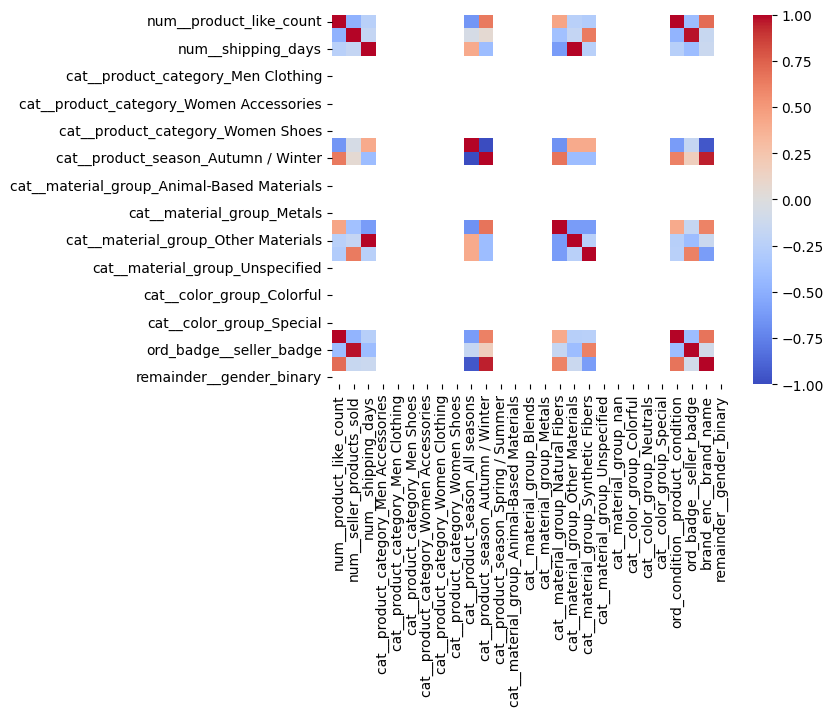

In [66]:
corr = transformed_df.corr()

# Plot the heatmap
sns.heatmap(corr, cmap='coolwarm')
plt.show()

# New model SGD

In [21]:
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.datasets import make_regression


In [22]:
def cleaning_df(df):
    df = df[df['price_usd'] <= 10000]
    df['usually_ships_within'] = df['usually_ships_within'].replace(np.nan, "1-2 days")
    df['has_cross_border_fees'] = df['has_cross_border_fees'].replace(np.nan, False)
    df['buyers_fees'] = df['buyers_fees'].replace(np.nan, 0)
    df = df.dropna()
    
    df['material_group'] = df['product_material'].map(material_mapping)
    df['shipping_days'] = df['usually_ships_within'].map(shipping_days_mapping)
    df['color_group'] = df['product_color'].map(color_mapping)
    
    df['gender_binary'] = df['product_gender_target'].map({'Men': 0, 'Women': 1})
    
    return df

    

In [110]:
clean_df = cleaning_df(df)
clean_df

/var/folders/51/br93cpt16z799l0l6d9pln2h0000gn/T/ipykernel_66616/3215484718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['usually_ships_within'] = df['usually_ships_within'].replace(np.nan, "1-2 days")
/var/folders/51/br93cpt16z799l0l6d9pln2h0000gn/T/ipykernel_66616/3215484718.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['has_cross_border_fees'] = df['has_cross_border_fees'].replace(np.nan, False)
/var/folders/51/br93cpt16z799l0l6d9pln2h0000gn/T/ipykernel_66616/3215484718.py:5: SettingWi

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate,material_group,shipping_days,color_group,gender_binary
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,...,Germany,3.0,14.0,0.0,13.0,0.0,Natural Fibers,1.5,Neutrals,1
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,...,Belgium,0.0,0.0,0.0,8.0,0.0,Natural Fibers,1.5,Neutrals,1
2,43246517,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,...,Spain,58.0,69.0,0.0,62.0,96.0,Natural Fibers,1.5,Neutrals,1
3,43246507,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,0.0,...,United States,63.0,274.0,126346.0,131.0,96.0,Synthetic Fibers,1.5,Neutrals,1
4,43246417,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,1.0,...,United Kingdom,19.0,14.0,102821.0,40.0,89.0,Other Materials,4.0,Neutrals,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900507,41538490,Leather heels,Leather heels Dior Black size 36 EU in Leather,Excellent condition Dior straw/jute pumps,Dior Leather Heels,Women,Women Shoes,All seasons,Very good condition,13.0,...,Italy,69.0,35.0,0.0,77.0,97.0,Animal-Based Materials,1.5,Neutrals,1
900509,41538360,Glitter trainers,Glitter trainers Bally Gold size 38 EU in Glit...,"Bally Vita Parcours sneakers. PPleather, suede...",Bally Glitter Trainers,Women,Women Shoes,All seasons,Good condition,1.0,...,Italy,40.0,17.0,391778.0,104.0,100.0,Other Materials,1.5,Special,1
900510,41532271,Leather heels,Leather heels Casadei Black size 38.5 EU in Le...,Trendy and classic Casadei high-heel pumps Mad...,Casadei Leather Heels,Women,Women Shoes,All seasons,Good condition,1.0,...,Austria,26.0,99.0,51408.0,75.0,89.0,Animal-Based Materials,1.5,Neutrals,1
900511,41538140,Leather cowboy boots,Leather cowboy boots Ash Black size 36 EU in L...,Very good quality leather boots Worn once Elas...,Ash Leather Boots,Women,Women Shoes,All seasons,Very good condition,0.0,...,France,0.0,2.0,0.0,3.0,0.0,Animal-Based Materials,1.5,Neutrals,1


In [111]:
df_sgd = clean_df.drop(['buyers_fees','product_gender_target','product_id', 'product_type', 
                      'brand_url', 'brand_id', 
                      'product_material', 'product_color', 'product_name', 
                      'product_description', 'product_keywords', 'warehouse_name', 'seller_id',
                      'seller_pass_rate', 'seller_num_followers', 'seller_country', 'seller_price', 
                      'seller_earning', 'seller_community_rank', 'seller_username', 
                      'seller_num_products_listed', 'sold', 'reserved', 'available', 
                      'in_stock', 'should_be_gone', 'has_cross_border_fees', 'usually_ships_within'], axis=1)
df_sgd.head(1)

,product_category,product_season,product_condition,product_like_count,brand_name,price_usd,seller_badge,seller_products_sold,material_group,shipping_days,color_group,gender_binary
0,Women Clothing,Autumn / Winter,Never worn,34.0,Miu Miu,272.92,Common,3.0,Natural Fibers,1.5,Neutrals,1


In [113]:
y = df_sgd['price_usd']
X = df_sgd.drop(columns=['price_usd'])
y_log = np.log(y)




X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.3)

In [73]:
X_preproc = preproc_brands.fit_transform(X_train, y_train)
X_preproc

array([[ 1.00000000e+00,  3.77906977e-01,  2.50000000e+00, ...,
         0.00000000e+00,  5.06313810e+00,  1.00000000e+00],
       [-3.33333333e-01, -5.81395349e-03,  0.00000000e+00, ...,
         0.00000000e+00,  3.49891820e+00,  1.00000000e+00],
       [ 3.66666667e+00, -1.86046512e-01,  0.00000000e+00, ...,
         0.00000000e+00,  6.21451982e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  1.33720930e-01,  0.00000000e+00, ...,
         1.00000000e+00,  6.02183158e+00,  1.00000000e+00],
       [ 6.66666667e-01,  1.80232558e-01,  2.50000000e+00, ...,
         1.00000000e+00,  5.45397749e+00,  0.00000000e+00],
       [-5.00000000e-01, -1.86046512e-01,  0.00000000e+00, ...,
         0.00000000e+00,  5.58775489e+00,  0.00000000e+00]])

In [74]:
lin_reg_sgd = SGDRegressor() # OLS solved by SGD

#lin_reg_sgd.fit(X_preproc,y_train)

In [76]:
pipe_sgd = make_pipeline(preproc_brands, lin_reg_sgd)

cv_results = cross_validate(pipe_sgd, X, y_log, cv=3, scoring='neg_mean_absolute_error')

# Calculate the mean score
mae = -cv_results['test_score'].mean()



In [77]:
mae

np.float64(426894926.9570667)

In [78]:
pipe_sgd = make_pipeline(preproc_brands, lin_reg_sgd)

pipe_sgd.fit(X_train,y_train)

# Make predictions
#pipe_baseline.predict(X_test.iloc[0:1])

# Score model
#r2score=pipe_sgd.score(X_test,y_test)
#sgd_score = cross_val_score(pipe_sgd, X, y_log, cv=5, scoring='r2').mean()
#sgd_score

/Users/apollinelabey/.pyenv/versions/3.10.6/envs/2nd_hand_fashion_valuation/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['product_like_count',
                                                   'seller_products_sold',
                                                   'shipping_days']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['product_category',
                                                   'product_season...
                                                 ('ord_condition',
                                                  OrdinalEncoder(categories=[['Fair '
                                                                              'condition',
                                                                              'Good '
                                                                              'condition',
                                                                              'Very '
                                                                              'good '
                                                                              'condition',
                                                                              'Never '
                                                                              'worn',
                                                                              'Never '
                                                                              'worn, '
                                                                              'with '
                                                                              'tag']]),
                                                  ['product_condition']),
                                                 ('ord_badge',
                                                  OrdinalEncoder(categories=[['Common',
                                                                              'Trusted',
                                                                              'Expert']]),
                                                  ['seller_badge']),
                                                 ('brand_enc',
                                                  TargetEncoder(target_type='continuous'),
                                                  ['brand_name'])])),
                ('sgdregressor', SGDRegressor())])

In [79]:
pipe_sgd.predict(X_test)

array([ 2.95949688e+09, -1.53725808e+09, -1.38750973e+09, ...,
       -8.73618062e+08,  4.93777451e+09,  8.16579952e+10])

In [80]:
y_train

849241    4.601965
110689    3.612538
373919    5.997869
277788    3.771611
598848    6.640947
            ...   
789282    4.820040
324799    7.493089
848369    6.198540
401687    4.419684
400783    3.934176
Name: price_usd, Length: 570974, dtype: float64

In [82]:
model = LinearRegression()
new_pipe = make_pipeline(preproc_brands, model )
new_pipe.fit(X_train, y_train)

/Users/apollinelabey/.pyenv/versions/3.10.6/envs/2nd_hand_fashion_valuation/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['product_like_count',
                                                   'seller_products_sold',
                                                   'shipping_days']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['product_category',
                                                   'product_season...
                                                  OrdinalEncoder(categories=[['Fair '
                                                                              'condition',
                                                                              'Good '
                                                                              'condition',
                                                                              'Very '
                                                                              'good '
                                                                              'condition',
                                                                              'Never '
                                                                              'worn',
                                                                              'Never '
                                                                              'worn, '
                                                                              'with '
                                                                              'tag']]),
                                                  ['product_condition']),
                                                 ('ord_badge',
                                                  OrdinalEncoder(categories=[['Common',
                                                                              'Trusted',
                                                                              'Expert']]),
                                                  ['seller_badge']),
                                                 ('brand_enc',
                                                  TargetEncoder(target_type='continuous'),
                                                  ['brand_name'])])),
                ('linearregression', LinearRegression())])

In [83]:
new_pipe.predict(X_test)

array([4.21636438, 5.92139387, 5.24215221, ..., 5.98415518, 5.66161823,
       5.49727631])

In [84]:
y_test

474894    4.270676
656031    5.730100
108191    4.410493
430399    4.614724
690010    5.112831
            ...   
859268    4.850467
146372    3.934176
760555    6.773652
827867    5.914205
788006    6.137727
Name: price_usd, Length: 244704, dtype: float64

# other models

## sgd

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet


In [86]:
df_sgd.shape

(815678, 12)

In [89]:
y = df_sgd['price_usd']
X = df_sgd.drop(columns=['price_usd'])
y_log = np.log(y)




X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.3)

In [96]:
# Create a preprocessor pipeline
num_mmx_transformer = make_pipeline(MinMaxScaler())

preproc_3 = ColumnTransformer(
    transformers=[
        ('num', num_mmx_transformer, ['product_like_count', 'seller_products_sold', 'shipping_days']),
        ('cat', cat_transformer, ['product_category', 'product_season', 'material_group', 'color_group']),
        ('ord_condition', ord_enc_product_condition, ['product_condition']),
        ('ord_badge', ord_enc_seller_badge, ['seller_badge']),
        ('brand_enc', brand_transformer, ['brand_name'])
    ],
    remainder='passthrough' 
)

preproc_3

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['product_like_count', 'seller_products_sold',
                                  'shipping_days']),
                                ('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['product_category', 'product_season',
                                  'material_group', 'color_group']),
                                ('ord_condition',
                                 OrdinalEncoder(categories=[['Fair condition',
                                                             'Good condition',
                                                             'Very good '
                                                             'condition',
                                                             'Never worn',
                                                             'Never worn, with '
                                                             'tag']]),
                                 ['product_condition']),
                                ('ord_badge',
                                 OrdinalEncoder(categories=[['Common',
                                                             'Trusted',
                                                             'Expert']]),
                                 ['seller_badge']),
                                ('brand_enc',
                                 TargetEncoder(target_type='continuous'),
                                 ['brand_name'])])

## elastic net

In [97]:
pipeline = make_pipeline(preproc_3, ElasticNet())


In [98]:
pipeline.fit(X_train,y_train)
pipeline.score(X_test,y_test)


-1.1904473085078138e-05

In [103]:

cv_results = cross_validate(pipeline, X, y_log, cv=3, scoring='neg_mean_absolute_error')

# Calculate the mean score
mae = -cv_results['test_score'].mean()
mae


np.float64(0.04194669978254314)

In [100]:
X.columns

Index(['product_category', 'product_season', 'product_condition',
       'product_like_count', 'brand_name', 'seller_badge',
       'seller_products_sold', 'material_group', 'shipping_days',
       'color_group', 'gender_binary'],
      dtype='object')

In [101]:
# Perform the permutation
permutation_score = permutation_importance(pipeline, X, y_log, n_repeats=10) 

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) 
importance_df.columns=['feature','score decrease']

# Show the important features
importance_df.sort_values(by="score decrease", ascending = False)

,feature,score decrease
0,product_category,0.0
1,product_season,0.0
2,product_condition,0.0
3,product_like_count,0.0
4,brand_name,0.0
5,seller_badge,0.0
6,seller_products_sold,0.0
7,material_group,0.0
8,shipping_days,0.0
9,color_group,0.0


In [102]:
pipeline.predict(X_test)

array([5.19340287, 5.19340287, 5.19340287, ..., 5.19340287, 5.19340287,
       5.19340287])

## XGBoost

In [106]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.1 MB/s eta 0:00:00a 0:00:01


In [81]:
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor

xgb_reg = XGBRegressor(max_depth=10, n_estimators=100, learning_rate=0.1)

pipe_xgb = make_pipeline(final_preproc, xgb_reg)
pipe_xgb.fit(X_train_preproc,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [82]:
cv_results = cross_validate(xgb_reg, X_train_preproc, y_train, cv=3, scoring='neg_mean_absolute_error')
-cv_results['test_score'].mean()

0.45559916031597997

In [86]:
xgb_reg.score(X_test_preproc,y_test)


-0.6043948843079399

In [118]:
# Perform the permutation
permutation_score = permutation_importance(pipe_xgb, X, y_log, n_repeats=10) 

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) 
importance_df.columns=['feature','score decrease']

# Show the important features
importance_df.sort_values(by="score decrease", ascending = False)

,feature,score decrease
4,brand_name,0.931146
7,material_group,0.25798
0,product_category,0.229615
2,product_condition,0.131196
6,seller_products_sold,0.065284
1,product_season,0.02873
3,product_like_count,0.020599
5,seller_badge,0.016235
8,shipping_days,0.010153
9,color_group,0.008674


In [87]:
#pipe_xgb = make_pipeline(preproc_3, xgb_reg)

# Define the parameter grid to search
param_grid = {
    'xgbregressor__max_depth': [8, 10, 12],   # Refining depth of the trees
    'xgbregressor__n_estimators': [140, 150, 160],  # Refining number of trees
    'xgbregressor__learning_rate': [0.15, 0.2, 0.25]  # Learning rate
}

# Set up the GridSearchCV
grid_search = GridSearchCV(xgb_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)

# Fit the model with GridSearch
grid_search.fit(X_train_preproc, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/Users/apollinelabey/.pyenv/versions/3.10.6/envs/2nd_hand_fashion_valuation/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:47:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "xgbregressor__learning_rate", "xgbregressor__max_depth", "xgbregressor__n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/apollinelabey/.pyenv/versions/3.10.6/envs/2nd_hand_fashion_valuation/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:47:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "xgbregressor__learning_rate", "xgbregressor__max_depth", "xgbregressor__n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/apollinelabey/.pyenv/versions/3.10.6/envs/2nd_hand_fashion_valuation/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:47:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "xgbregressor__learning_rate", "xgb

/Users/apollinelabey/.pyenv/versions/3.10.6/envs/2nd_hand_fashion_valuation/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:48:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "xgbregressor__learning_rate", "xgbregressor__max_depth", "xgbregressor__n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/apollinelabey/.pyenv/versions/3.10.6/envs/2nd_hand_fashion_valuation/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:49:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "xgbregressor__learning_rate", "xgbregressor__max_depth", "xgbregressor__n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/apollinelabey/.pyenv/versions/3.10.6/envs/2nd_hand_fashion_valuation/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:49:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "xgbregressor__learning_rate", "xgb

/Users/apollinelabey/.pyenv/versions/3.10.6/envs/2nd_hand_fashion_valuation/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:51:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "xgbregressor__learning_rate", "xgbregressor__max_depth", "xgbregressor__n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/apollinelabey/.pyenv/versions/3.10.6/envs/2nd_hand_fashion_valuation/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:51:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "xgbregressor__learning_rate", "xgbregressor__max_depth", "xgbregressor__n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/apollinelabey/.pyenv/versions/3.10.6/envs/2nd_hand_fashion_valuation/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:51:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "xgbregressor__learning_rate", "xgb

/Users/apollinelabey/.pyenv/versions/3.10.6/envs/2nd_hand_fashion_valuation/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:52:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "xgbregressor__learning_rate", "xgbregressor__max_depth", "xgbregressor__n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/apollinelabey/.pyenv/versions/3.10.6/envs/2nd_hand_fashion_valuation/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:52:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "xgbregressor__learning_rate", "xgbregressor__max_depth", "xgbregressor__n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/apollinelabey/.pyenv/versions/3.10.6/envs/2nd_hand_fashion_valuation/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:52:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "xgbregressor__learning_rate", "xgb

/Users/apollinelabey/.pyenv/versions/3.10.6/envs/2nd_hand_fashion_valuation/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "xgbregressor__learning_rate", "xgbregressor__max_depth", "xgbregressor__n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/apollinelabey/.pyenv/versions/3.10.6/envs/2nd_hand_fashion_valuation/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "xgbregressor__learning_rate", "xgbregressor__max_depth", "xgbregressor__n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/apollinelabey/.pyenv/versions/3.10.6/envs/2nd_hand_fashion_valuation/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "xgbregressor__learning_rate", "xgb

/Users/apollinelabey/.pyenv/versions/3.10.6/envs/2nd_hand_fashion_valuation/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:56:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "xgbregressor__learning_rate", "xgbregressor__max_depth", "xgbregressor__n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/apollinelabey/.pyenv/versions/3.10.6/envs/2nd_hand_fashion_valuation/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:56:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "xgbregressor__learning_rate", "xgbregressor__max_depth", "xgbregressor__n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/apollinelabey/.pyenv/versions/3.10.6/envs/2nd_hand_fashion_valuation/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:56:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "xgbregressor__learning_rate", "xgb

In [88]:
#new gridearch
print("Best Parameters:", best_params)
print("Best Cross-Validation MAE Score:", -best_score)  # Convert back to positive


Best Parameters: {'xgbregressor__learning_rate': 0.15, 'xgbregressor__max_depth': 8, 'xgbregressor__n_estimators': 140}
Best Cross-Validation MAE Score: 0.4543063004477541


In [127]:
print("Best Parameters:", best_params)
print("Best Cross-Validation MAE Score:", -best_score)  # Convert back to positive


Best Parameters: {'xgbregressor__learning_rate': 0.2, 'xgbregressor__max_depth': 10, 'xgbregressor__n_estimators': 150}
Best Cross-Validation MAE Score: 0.4492590327688438


In [43]:
from sklearn.metrics import mean_absolute_error, r2_score

In [89]:
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_preproc)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error of the best model on the test set:", mae)
print("R-squared (R²) of the best model on the test set:", r2)

Mean Absolute Error of the best model on the test set: 1.020747184705109
R-squared (R²) of the best model on the test set: -0.6043948843079399


## DTR

In [119]:
from sklearn.tree import DecisionTreeRegressor

In [120]:
DT_reg = DecisionTreeRegressor()

pipe_DT = make_pipeline(preproc_3, DT_reg)
pipe_DT.fit(X_train,y_train)

/Users/apollinelabey/.pyenv/versions/3.10.6/envs/2nd_hand_fashion_valuation/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['product_like_count',
                                                   'seller_products_sold',
                                                   'shipping_days']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['product_category',
                                                   'product_season...
                                                  OrdinalEncoder(categories=[['Fair '
                                                                              'condition',
                                                                              'Good '
                                                                              'condition',
                                                                              'Very '
                                                                              'good '
                                                                              'condition',
                                                                              'Never '
                                                                              'worn',
                                                                              'Never '
                                                                              'worn, '
                                                                              'with '
                                                                              'tag']]),
                                                  ['product_condition']),
                                                 ('ord_badge',
                                                  OrdinalEncoder(categories=[['Common',
                                                                              'Trusted',
                                                                              'Expert']]),
                                                  ['seller_badge']),
                                                 ('brand_enc',
                                                  TargetEncoder(target_type='continuous'),
                                                  ['brand_name'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [122]:
cv_results = cross_validate(pipe_DT, X, y_log, cv=3, scoring='neg_mean_absolute_error')
-cv_results['test_score'].mean()

np.float64(0.8107600091909605)

In [123]:
pipe_DT.score(X_test,y_test)


0.3201764720997098

In [124]:
pipe_DT.predict(X_test)

array([5.66583828, 3.88280015, 7.87089143, ..., 5.38357721, 5.0369526 ,
       5.9245766 ])

# Deep learning

In [32]:
final_preproc = ColumnTransformer(
    transformers=[
        ('num', num_transformer, [ 'seller_products_sold', 'shipping_days']),
        ('cat', cat_transformer, ['product_category', 'product_season', 'material_group', 'color_group']),
        ('ord_condition', ord_enc_product_condition, ['product_condition']),
        ('ord_badge', ord_enc_seller_badge, ['seller_badge']),
        ('brand_enc', brand_transformer, ['brand_name'])
    ],
    remainder='passthrough' 
)
final_preproc


ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('robustscaler',
                                                  RobustScaler())]),
                                 ['seller_products_sold', 'shipping_days']),
                                ('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['product_category', 'product_season',
                                  'material_group', 'color_group']),
                                ('ord_condition',
                                 OrdinalEncoder(categories=[['Fair condition',
                                                             'Good condition',
                                                             'Very good '
                                                             'condition',
                                                             'Never worn',
                                                             'Never worn, with '
                                                             'tag']]),
                                 ['product_condition']),
                                ('ord_badge',
                                 OrdinalEncoder(categories=[['Common',
                                                             'Trusted',
                                                             'Expert']]),
                                 ['seller_badge']),
                                ('brand_enc',
                                 TargetEncoder(target_type='continuous'),
                                 ['brand_name'])])

In [71]:
DL_df = cleaning_df(df)
DL_df

/var/folders/51/br93cpt16z799l0l6d9pln2h0000gn/T/ipykernel_77926/3215484718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['usually_ships_within'] = df['usually_ships_within'].replace(np.nan, "1-2 days")
/var/folders/51/br93cpt16z799l0l6d9pln2h0000gn/T/ipykernel_77926/3215484718.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['has_cross_border_fees'] = df['has_cross_border_fees'].replace(np.nan, False)
/var/folders/51/br93cpt16z799l0l6d9pln2h0000gn/T/ipykernel_77926/3215484718.py:4: SettingWithCopyWarnin

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate,gender_binary,material_group,shipping_days,color_group
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,...,Germany,3.0,14.0,0.0,13.0,0.0,1,Natural Fibers,1.5,Neutrals
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,...,Belgium,0.0,0.0,0.0,8.0,0.0,1,Natural Fibers,1.5,Neutrals
2,43246517,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,...,Spain,58.0,69.0,0.0,62.0,96.0,1,Natural Fibers,1.5,Neutrals
3,43246507,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,0.0,...,United States,63.0,274.0,126346.0,131.0,96.0,1,Synthetic Fibers,1.5,Neutrals
4,43246417,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,1.0,...,United Kingdom,19.0,14.0,102821.0,40.0,89.0,1,Other Materials,4.0,Neutrals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900509,41538360,Glitter trainers,Glitter trainers Bally Gold size 38 EU in Glit...,"Bally Vita Parcours sneakers. PPleather, suede...",Bally Glitter Trainers,Women,Women Shoes,All seasons,Good condition,1.0,...,Italy,40.0,17.0,391778.0,104.0,100.0,1,Other Materials,1.5,Special
900510,41532271,Leather heels,Leather heels Casadei Black size 38.5 EU in Le...,Trendy and classic Casadei high-heel pumps Mad...,Casadei Leather Heels,Women,Women Shoes,All seasons,Good condition,1.0,...,Austria,26.0,99.0,51408.0,75.0,89.0,1,Animal-Based Materials,1.5,Neutrals
900511,41538140,Leather cowboy boots,Leather cowboy boots Ash Black size 36 EU in L...,Very good quality leather boots Worn once Elas...,Ash Leather Boots,Women,Women Shoes,All seasons,Very good condition,0.0,...,France,0.0,2.0,0.0,3.0,0.0,1,Animal-Based Materials,1.5,Neutrals
900512,41537603,Leather ballet flats,Leather ballet flats Lauren Ralph Lauren Black...,Very beautiful ballet flats like new. I don't ...,Lauren Ralph Lauren Leather Ballet flats,Women,Women Shoes,All seasons,Very good condition,27.0,...,Italy,2.0,7.0,0.0,11.0,100.0,1,Animal-Based Materials,1.5,Neutrals


In [74]:
DL_df = DL_df.drop(['product_like_count', 'buyers_fees','product_gender_target','product_id', 'product_type', 
                      'brand_url', 'brand_id', 
                      'product_material', 'product_color', 'product_name', 
                      'product_description', 'product_keywords', 'warehouse_name', 'seller_id',
                      'seller_pass_rate', 'seller_num_followers', 'seller_country', 'seller_price', 
                      'seller_earning', 'seller_community_rank', 'seller_username', 
                      'seller_num_products_listed', 'sold', 'reserved', 'available', 
                      'in_stock', 'should_be_gone', 'has_cross_border_fees', 'usually_ships_within'], axis=1)
DL_df.head(1)

KeyError: "['product_like_count', 'buyers_fees', 'product_gender_target', 'product_id', 'product_type', 'brand_url', 'brand_id', 'product_material', 'product_color', 'product_name', 'product_description', 'product_keywords', 'warehouse_name', 'seller_id', 'seller_pass_rate', 'seller_num_followers', 'seller_country', 'seller_price', 'seller_earning', 'seller_community_rank', 'seller_username', 'seller_num_products_listed', 'sold', 'reserved', 'available', 'in_stock', 'should_be_gone', 'has_cross_border_fees', 'usually_ships_within'] not found in axis"

In [73]:
DL_df.shape

(897131, 11)

In [75]:
y = DL_df['price_usd']
X = DL_df.drop(columns=['price_usd'])
y_log = np.log(y)


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.3)

In [77]:
X_train_preproc = final_preproc.fit_transform(X_train, y_train)


In [38]:
from keras.callbacks import EarlyStopping


In [58]:
# Define the deep learning model
model = Sequential()
es = EarlyStopping(
        monitor="val_loss",
        patience=2,
        restore_best_weights=True,
        verbose=0
    )


# Input layer
model.add(layers.Input(shape=(X_train_preproc.shape[1],)))

# Hidden layers
model.add(layers.Dense(64, activation='relu'))  # First hidden layer with 64 units
#model.add(layers.Dense(64, activation='relu'))  # Second hidden layer with 64 units
model.add(layers.Dense(32, activation='relu'))  # Third hidden layer with 32 units

# Output layer (for regression, no activation is used)
model.add(layers.Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

# Train the model
history = model.fit(X_train_preproc, y_train, epochs=100, 
                    callbacks=[es], batch_size=32, validation_split=0.3)


Epoch 1/100
13738/13738 [==============================] - 32s 2ms/step - loss: 0.5310 - mae: 0.5310 - val_loss: 0.5208 - val_mae: 0.5208
Epoch 2/100
13738/13738 [==============================] - 31s 2ms/step - loss: 0.5072 - mae: 0.5072 - val_loss: 0.5086 - val_mae: 0.5086
Epoch 3/100
13738/13738 [==============================] - 31s 2ms/step - loss: 0.5022 - mae: 0.5022 - val_loss: 0.5006 - val_mae: 0.5006
Epoch 4/100
13738/13738 [==============================] - 32s 2ms/step - loss: 0.4996 - mae: 0.4996 - val_loss: 0.5033 - val_mae: 0.5033
Epoch 5/100
13738/13738 [==============================] - 33s 2ms/step - loss: 0.4977 - mae: 0.4977 - val_loss: 0.5036 - val_mae: 0.5036


In [59]:
y_pred.shape

(269140, 1)

In [47]:
X_test_preproc = final_preproc.fit_transform(X_test, y_test)


In [46]:
y_test.shape

(269140,)

In [48]:
# Predicting on the test set
y_pred = model.predict(X_test_preproc)

# Convert predictions back from log scale
#y_pred_real = np.expm1(y_pred_log)
#y_test_real =np.expm1(y_test)

# Calculate the MAE and R-squared
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R-squared:", r2)

8411/8411 [==============================] - 8s 935us/step
Mean Absolute Error: 0.4974877874799277
R-squared: 0.5942352875660494


In [53]:
mae_xgb =np.expm1(0.444)
mae_xgb

0.5589304856219153

In [50]:
from keras import Model, Sequential, layers, regularizers, optimizers


In [56]:
# other attempt

model2 = Sequential()
model2.add(layers.Input(shape=X_train_preproc.shape[1]))
model2.add(layers.Dense(70, activation="relu"))
model2.add(layers.Dense(30, activation="relu"))
model2.add(layers.Dense(1, activation="linear"))

model2.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

# Train the model
history = model2.fit(X_train_preproc, y_train, epochs=100, 
                    callbacks=[es], batch_size=32, validation_split=0.3)

Epoch 1/100
13738/13738 [==============================] - 30s 2ms/step - loss: 0.5229 - mae: 0.5334 - val_loss: 0.4283 - val_mae: 0.5045
Epoch 2/100
13738/13738 [==============================] - 33s 2ms/step - loss: 0.4330 - mae: 0.5076 - val_loss: 0.4376 - val_mae: 0.5062
Epoch 3/100
13738/13738 [==============================] - 39s 3ms/step - loss: 0.4268 - mae: 0.5039 - val_loss: 0.4210 - val_mae: 0.4990
Epoch 4/100
13738/13738 [==============================] - 32s 2ms/step - loss: 0.4232 - mae: 0.5016 - val_loss: 0.4202 - val_mae: 0.5002
Epoch 5/100
13726/13738 [============================>.] - ETA: 0s - loss: 0.4204 - mae: 0.4998

KeyboardInterrupt: 

In [60]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV

In [66]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

def build_model():
    model = Sequential()
    model.add(layers.Input(shape=(X_train_preproc.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])
    return model

model = KerasRegressor(build_fn=build_model, verbose=0)

# Early stopping callback
es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Define the hyperparameter grid
param_grid = {
    'batch_size': [16, 32, 64],       # Different batch sizes
    'epochs': [50, 100, 150]        # Different epoch numbers
     # learning_rate passed to build_model
}

# Grid search with cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Perform the grid search with early stopping
grid_result = grid.fit(X_train_preproc, y_train, callbacks=[es])

# Get the best score and parameters
print(f"Best MAE: {grid_result.best_score_}")
print(f"Best parameters: {grid_result.best_params_}")

/var/folders/51/br93cpt16z799l0l6d9pln2h0000gn/T/ipykernel_77926/3244324618.py:16: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=build_model, verbose=0)
2024-09-06 10:41:41.553314: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-06 10:41:41.553314: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations,

KeyboardInterrupt: 

In [90]:
import streamlit as st

ModuleNotFoundError: No module named 'streamlit'

In [ ]:
'''
'''

st.markdown('''
#2nd Hand Fashion Evaluation
## Sell you pre-owned luxury items at the optimal price!
''')

'''
## Here we would like to add some controllers in order to ask the user to select the parameters
'''
# Load options from txt files
brands = load_options('unique_values_txt_files/uv_brands.txt')
materials = load_options('unique_values_txt_files/uv_materials.txt')
conditions = load_options('unique_values_txt_files/uv_condition.txt')
shipping_days = load_options('unique_values_txt_files/uv_shipping_days.txt')
genders = load_options('unique_values_txt_files/uv_gender.txt')
colors = load_options('unique_values_txt_files/uv_colors.txt')
categories = load_options('unique_values_txt_files/uv_category.txt')
seasons = load_options('unique_values_txt_files/uv_season.txt')
seller_badges = load_options('unique_values_txt_files/uv_seller_badge.txt')

# Streamlit app layout
st.title('Product Information')

# Input field for product description
product_description = st.text_input('Enter a short product description: ')

# Drop-down menus for selections
material = st.selectbox('Select Material', materials)
brand = st.selectbox('Select Brand', brands)
condition = st.selectbox('Select Condition', conditions)
shipping_time = st.selectbox('Select Shipping Time', shipping_days)
gender_target = st.selectbox('Select Gender Target', genders)
color = st.selectbox('Select Color', colors)
category = st.selectbox('Select Category', categories)
season = st.selectbox('Select Season', seasons)
seller_badge = st.selectbox('Select Seller Badge', seller_badges)

# Input field for number of products sold
products_sold = st.number_input('Enter the number of products sold', min_value=0, step=1)

# Button to submit the form
if st.button('Submit'):
    
    
    st.write('Product Description:', product_description)
    st.write('Material:', material)
    st.write('Brand:', brand)
    st.write('Condition:', condition)
    st.write('Shipping Time:', shipping_time)
    st.write('Gender Target:', gender_target)
    st.write('Color:', color)
    st.write('Category:', category)
    st.write('Season:', season)
    st.write('Seller Badge:', seller_badge)
    st.write('Number of Products Sold:', products_sold)
'''
## Once we have these, let's call our API in order to retrieve a prediction

See ? No need to load a `model.joblib` file in this app, we do not even need to know anything about Data Science in order to retrieve a prediction...

🤔 How could we call our API ? Off course... The `requests` package 💡
'''

url = 'https://taxifare.lewagon.ai/predict'

if url == 'https://taxifare.lewagon.ai/predict':

    st.markdown('Maybe you want to use your own API for the prediction, not the one provided by Le Wagon...')

'''

2. Let's build a dictionary containing the parameters for our API...

3. Let's call our API using the `requests` package...

4. Let's retrieve the prediction from the **JSON** returned by the API...

## Finally, we can display the prediction to the user
'''

# clusters

In [35]:
bins = [0, 100, 500, 1000, 5000, df_capped['price_usd'].max()]
labels = ['Low', 'Medium-Low', 'Medium', 'High', 'Very High']

# Apply bins to the price column
df_capped['price_cluster'] = pd.cut(df_capped['price_usd'], bins=bins, labels=labels, include_lowest=True)

# Check distribution of products per cluster
df_capped['price_cluster'].value_counts()


/var/folders/51/br93cpt16z799l0l6d9pln2h0000gn/T/ipykernel_8270/3800758010.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_capped['price_cluster'] = pd.cut(df_capped['price_usd'], bins=bins, labels=labels, include_lowest=True)


price_cluster
Medium-Low    481816
Low           278383
Medium         91165
High           43181
Very High       3822
Name: count, dtype: int64

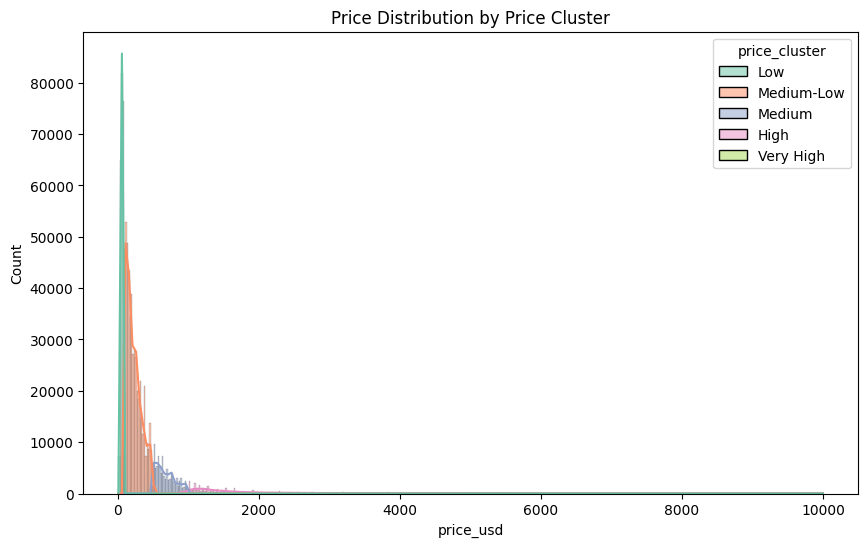

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_capped, x='price_usd', hue='price_cluster', bins=500, kde=True, palette="Set2")
plt.title('Price Distribution by Price Cluster')
plt.show()


/var/folders/51/br93cpt16z799l0l6d9pln2h0000gn/T/ipykernel_8270/3329628324.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_cluster', y='price_usd', data=df_capped, palette="Set3")


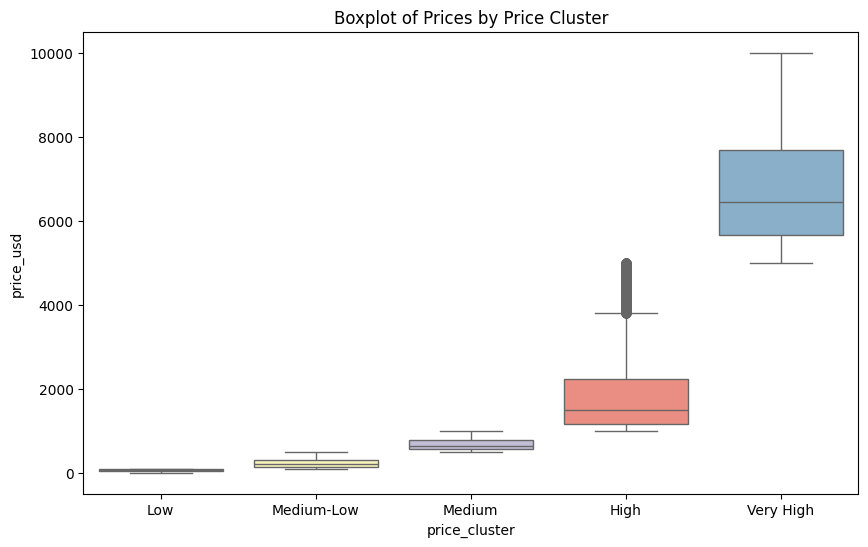

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_cluster', y='price_usd', data=df_capped, palette="Set3")
plt.title('Boxplot of Prices by Price Cluster')
plt.show()


/var/folders/51/br93cpt16z799l0l6d9pln2h0000gn/T/ipykernel_8270/1544208926.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_cluster', y='price_usd', data=filtered_df, palette="Set3")


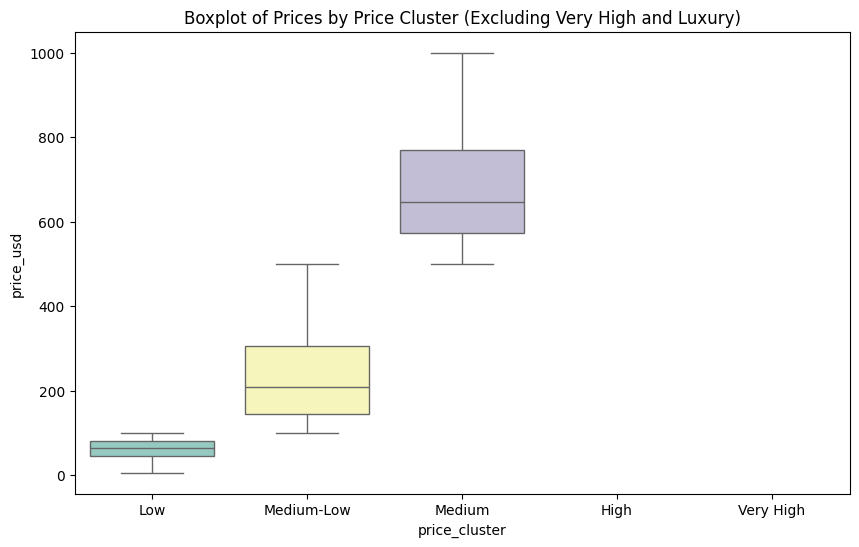

In [38]:
# Filter out 'Very High' and 'Luxury' clusters
filtered_df = df_capped[~df_capped['price_cluster'].isin(['High','Very High'])]

# Plot the boxplot for the remaining clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_cluster', y='price_usd', data=filtered_df, palette="Set3")
plt.title('Boxplot of Prices by Price Cluster (Excluding Very High and Luxury)')
plt.show()

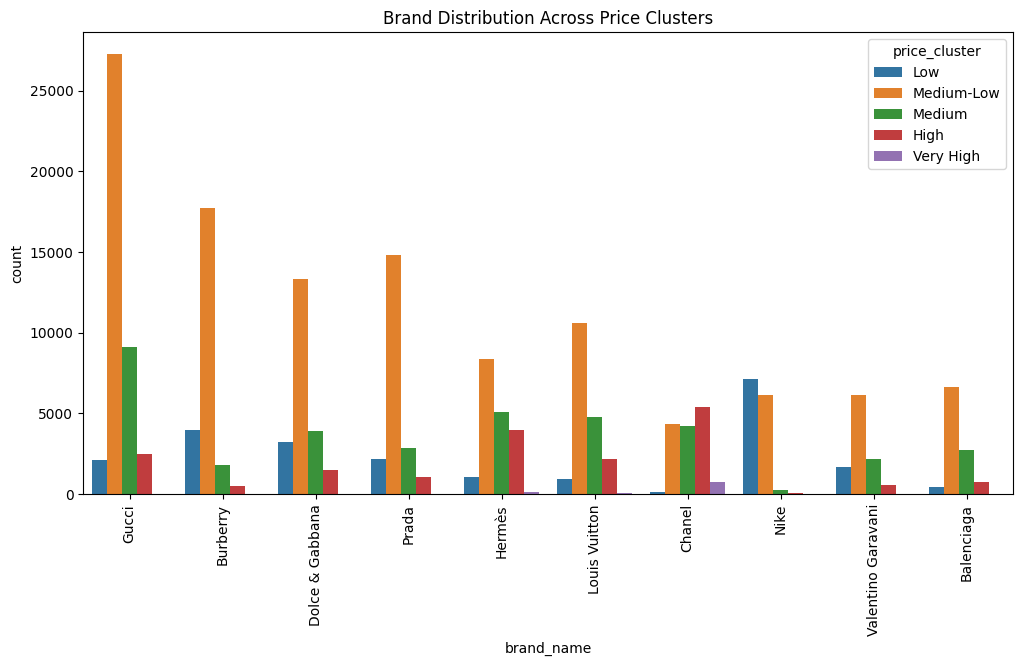

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(x='brand_name', hue='price_cluster', data=df_capped, order=df_capped['brand_name'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title('Brand Distribution Across Price Clusters')
plt.show()


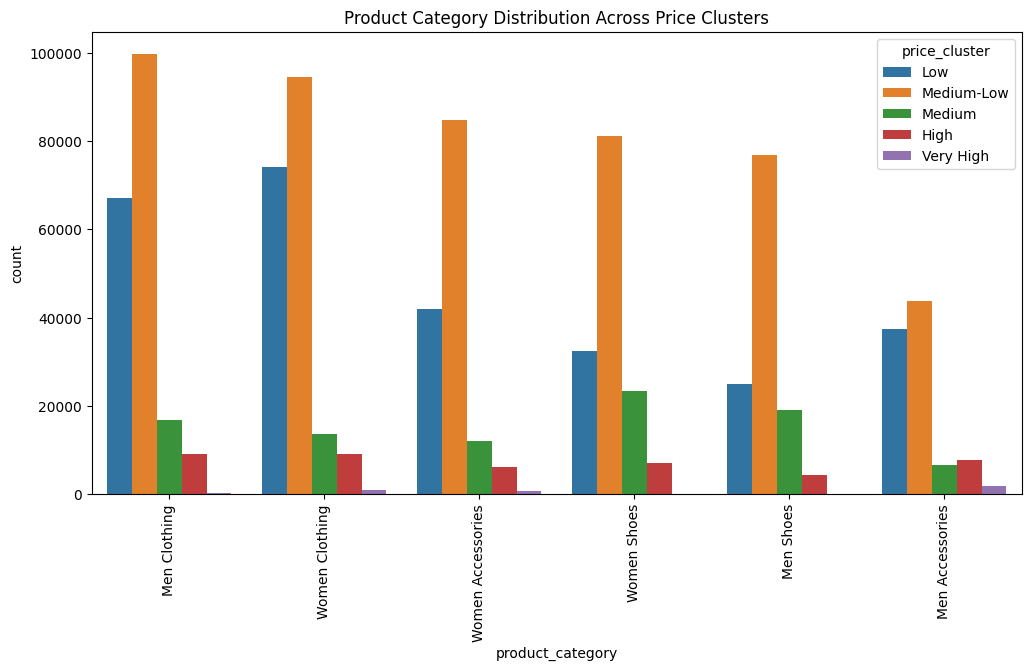

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(x='product_category', hue='price_cluster', data=df_capped, order=df_capped['product_category'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Product Category Distribution Across Price Clusters')
plt.show()


In [41]:
brand_price_cluster = df_capped.groupby(['brand_name', 'price_cluster'])['price_usd'].mean().unstack()
brand_price_cluster.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Average Price by Brand and Price Cluster')
plt.xticks(rotation=90)
plt.show()


/var/folders/51/br93cpt16z799l0l6d9pln2h0000gn/T/ipykernel_8270/3203091587.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  brand_price_cluster = df_capped.groupby(['brand_name', 'price_cluster'])['price_usd'].mean().unstack()


KeyboardInterrupt: 